In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from magpylib.source.magnet import Cylinder
import magpylib as magpy

# create collection of two magnets
s1 = Cylinder(mag=[0,0,1280], dim=[72,13])
s2 = Cylinder(mag=[0,0,-1280], dim=[32.5,13])
c = magpy.Collection(s1,s2)

# create positions
xs = np.linspace(-50,50,200)
zs = np.linspace(-50,50,200)
ys = np.linspace(-50,50,200)
posis = [[x,0,z] for z in zs for x in xs]
posis_y = [[x,y,0] for y in ys for x in xs]

# calculate field and amplitude
B = [c.getB(pos) for pos in posis]
Bs = np.array(B).reshape([200,200,3]) #reshape
Bamp = np.linalg.norm(Bs,axis=2)

B_y = [c.getB(pos) for pos in posis_y]
Bs_y = np.array(B_y).reshape([200,200,3]) #reshape
Bamp_y = np.linalg.norm(Bs_y,axis=2)



Bad key savefig.frameon in file /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an updated matplotlibrc file from
https

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


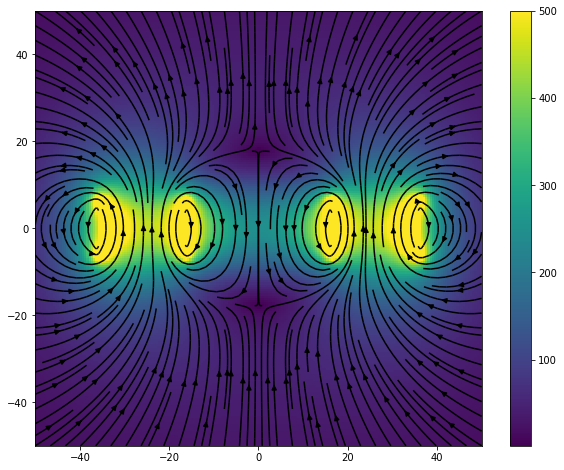

In [2]:
# define figure with a 2d and a 3d axis
fig = plt.figure(figsize=(10,8))
ax2 = fig.add_subplot(111)
'''
ax1 = fig.add_subplot(121,projection='3d')
ax2 = fig.add_subplot(122)

# add displaySystem on ax1
magpy.displaySystem(c,subplotAx=ax1,suppress=True)
ax1.view_init(elev=45)
'''
# amplitude plot on ax2
X,Z = np.meshgrid(xs,zs)
pc = ax2.pcolor(xs,zs,Bamp,cmap='viridis', vmax=500)
plt.colorbar(pc)

# plot field lines on ax2
U,V = Bs[:,:,0], Bs[:,:,2]
ax2.streamplot(X,Z,U,V,color='k',density=2)

plt.rc('font', family='serif')
plt.rc('ytick', labelsize='12')
plt.rc('xtick', labelsize='12')

#display
plt.show()

In [3]:
positions = np.arange(-1,1.1,0.1)
z_field1 = []
z_field2 = []
z_field3 = []
for i in positions:
    z_field1.append(c.getB([i,0,0])[2])
    
for i in positions:
    z_field2.append(c.getB([0,0,i])[2])
'''
for i in positions:
    z_field3.append(c.getB([i,0,10])[2])
'''

'\nfor i in positions:\n    z_field3.append(c.getB([i,0,10])[2])\n'

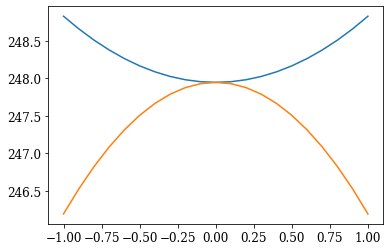

In [4]:
plt.plot(positions, np.absolute(z_field1))
plt.plot(positions, np.absolute(z_field2))

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from magpylib.source.magnet import Cylinder
import magpylib as magpy

delta = 4.2

# create collection of two magnets
s1 = Cylinder(mag=[0,0,1280], dim=[72,13], pos=[0,0,-6.5-delta])
s2 = Cylinder(mag=[0,0,-1280], dim=[32.5,13], pos=[0,0,-6.5-delta])
s3 = Cylinder(mag=[0,0,1280], dim=[72,13], pos=[0,0,6.5+delta])
s4 = Cylinder(mag=[0,0,-1280], dim=[32.5,13], pos=[0,0,6.5+delta])
c = magpy.Collection(s1,s2,s3,s4)

# create positions
xs = np.linspace(-50,50,200)
zs = np.linspace(-50,50,200)
posis = [[x,0,z] for z in zs for x in xs]

# calculate field and amplitude
B = [c.getB(pos) for pos in posis]
Bs = np.array(B).reshape([200,200,3]) #reshape
Bamp = np.linalg.norm(Bs,axis=2)

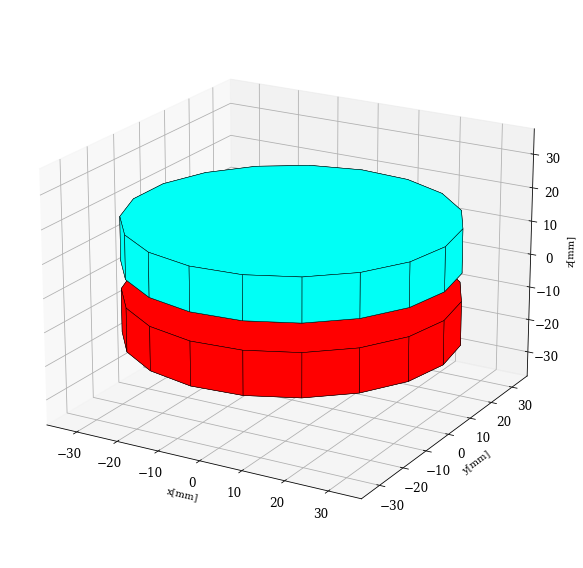

In [25]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111,projection='3d')
magpy.displaySystem(c,subplotAx=ax1,suppress=True)
ax1.view_init(elev=20)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  app.launch_new_instance()


"\n# Create a Rectangle patch\nrect1 = patches.Rectangle((-36,5.5),19.75,13,linewidth=1,edgecolor='w',facecolor='none')\nrect2 = patches.Rectangle((-36,-18.5),19.75,13,linewidth=1,edgecolor='w',facecolor='none')\nrect3 = patches.Rectangle((16.25,5.5),19.75,13,linewidth=1,edgecolor='w',facecolor='none')\nrect4 = patches.Rectangle((16.25,-18.5),19.75,13,linewidth=1,edgecolor='w',facecolor='none')\n# Add the patch to the Axes\nax2.add_patch(rect1)\nax2.add_patch(rect2)\nax2.add_patch(rect3)\nax2.add_patch(rect4)\n"

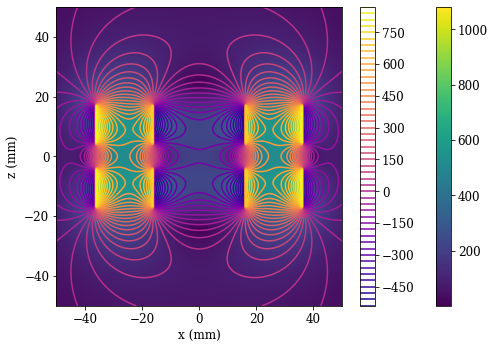

In [26]:
# define figure with a 2d and a 3d axis
fig = plt.figure(figsize=(8,5.5))
#ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(111)
'''
ax1 = fig.add_subplot(121,projection='3d')
ax2 = fig.add_subplot(122)

# add displaySystem on ax1
magpy.displaySystem(c,subplotAx=ax1,suppress=True)
ax1.view_init(elev=45)
'''
# amplitude plot on ax2
X,Z = np.meshgrid(xs,zs)
#pc1 = ax1.pcolor(xs,zs,Bamp,cmap='viridis')
pc2 = ax2.pcolor(xs,zs,Bamp,cmap='viridis')
plt.colorbar(pc2)

# plot field lines on ax2
U,V = Bs[:,:,0], Bs[:,:,2]
#ax2.streamplot(X,Z,U,V,color='k',density=2)
cc = ax2.contour(X,Z,V, levels=50, cmap='plasma')
plt.colorbar(cc)

ax2.set_ylabel('z (mm)', fontsize=12)
ax2.set_xlabel('x (mm)', fontsize=12)

'''
ax2.axhline(y=0, color='w')
ax2.axhline(y=10, color='w')
'''

#plt.title('Magnetic field simulation for 80mm seperation')

#ax2.axhline(y=11.5, color='w')

plt.rc('font', family='serif')
plt.rc('ytick', labelsize='12')
plt.rc('xtick', labelsize='12')
'''
# Create a Rectangle patch
rect1 = patches.Rectangle((-36,5.5),19.75,13,linewidth=1,edgecolor='w',facecolor='none')
rect2 = patches.Rectangle((-36,-18.5),19.75,13,linewidth=1,edgecolor='w',facecolor='none')
rect3 = patches.Rectangle((16.25,5.5),19.75,13,linewidth=1,edgecolor='w',facecolor='none')
rect4 = patches.Rectangle((16.25,-18.5),19.75,13,linewidth=1,edgecolor='w',facecolor='none')
# Add the patch to the Axes
ax2.add_patch(rect1)
ax2.add_patch(rect2)
ax2.add_patch(rect3)
ax2.add_patch(rect4)
'''
#display
#plt.show()
#plt.savefig('/Users/lyracronin/Dropbox/Apps/Overleaf/mqthesis-master/field_simulation.pdf')

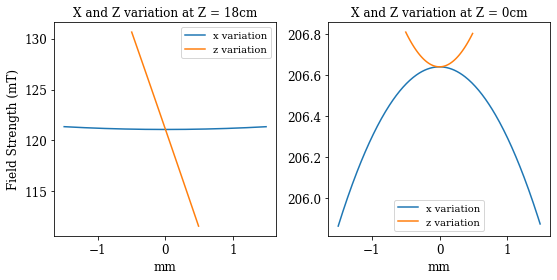

In [27]:
xpositions = np.arange(-1.5,1.5,0.01)
zpositions = np.arange(-0.5,0.5,0.01)
z_field1 = []
z_field2 = []
z_field3 = []
z_field4 = []

for i in xpositions:
    z_field1.append(c.getB([i,0,18])[2])

for i in zpositions:
    z_field2.append(c.getB([0,0,18+i])[2])
    
for i in xpositions:
    z_field3.append(c.getB([i,0,0])[2])
    
for i in zpositions:
    z_field4.append(c.getB([0,0,i])[2])

fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(121)
plt.title('X and Z variation at Z = 18cm')
ax1.plot(xpositions, np.absolute(z_field1), label='x variation')
ax1.plot(zpositions, np.absolute(z_field2), label='z variation')
plt.legend()
ax1.set_ylabel('Field Strength (mT)', fontsize=12)
ax1.set_xlabel('mm', fontsize=12)

ax2 = fig.add_subplot(122)
plt.title('X and Z variation at Z = 0cm')
ax2.plot(xpositions, np.absolute(z_field3), label='x variation')
ax2.plot(zpositions, np.absolute(z_field4), label='z variation')
plt.legend()
#ax2.set_ylabel('Field Strength (mT)', fontsize=12)
ax2.set_xlabel('mm', fontsize=12)

plt.tight_layout()

#plt.savefig('/Users/lyracronin/Dropbox/Apps/Overleaf/mqthesis-master/field_variation.pdf')

In [151]:
seperation = []
homogeneity = []
strength = []

delta = np.arange(0.5, 10, 0.1)

for j in delta:
    # create collection of two magnets
    s1 = Cylinder(mag=[0,0,1280], dim=[72,13], pos=[0,0,-6.5-j])
    s2 = Cylinder(mag=[0,0,-1280], dim=[32.5,13], pos=[0,0,-6.5-j])
    s3 = Cylinder(mag=[0,0,1280], dim=[72,13], pos=[0,0,6.5+j])
    s4 = Cylinder(mag=[0,0,-1280], dim=[32.5,13], pos=[0,0,6.5+j])
    c = magpy.Collection(s1,s2,s3,s4)

    # create positions
    xs = np.linspace(-50,50,200)
    zs = np.linspace(-50,50,200)
    posis = [[x,0,z] for z in zs for x in xs]

    # calculate field and amplitude
    B = [c.getB(pos) for pos in posis]
    Bs = np.array(B).reshape([200,200,3]) #reshape
    Bamp = np.linalg.norm(Bs,axis=2)

    xpositions = np.arange(-1.5,1.5,0.01)
    zpositions = np.arange(-0.5,0.5,0.01)
    z_field1 = []
    z_field2 = []
    z_field3 = []
    z_field4 = []

    for i in xpositions:
        z_field1.append(c.getB([i,0,18])[2])

    for i in zpositions:
        z_field2.append(c.getB([0,0,18+i])[2])

    for i in xpositions:
        z_field3.append(c.getB([i,0,0])[2])

    for i in zpositions:
        z_field4.append(c.getB([0,0,i])[2])

    seperation.append(2*j)
    homogeneity.append(np.max([np.max(z_field3),np.max(z_field4)]) - np.min([np.min(z_field3),np.min(z_field4)]))
    strength.append(c.getB([0,0,0])[2])

    homogeneity.sort()
    seperation.sort()
    strength.sort()
    print(homogeneity)
    print(seperation)
    print(strength)

[nan]
[1.0]
[-346.917282113099]
[nan, 1.3314236201978247]
[1.0, 1.2]
[-346.917282113099, -343.26201786662443]
[nan, 1.2570317348611297, 1.3314236201978247]
[1.0, 1.2, 1.4]
[-346.917282113099, -343.26201786662443, -339.5873519149787]
[nan, 1.1829001454478316, 1.2570317348611297, 1.3314236201978247]
[1.0, 1.2, 1.4, 1.5999999999999999]
[-346.917282113099, -343.26201786662443, -339.5873519149787, -335.89435982004625]
[nan, 1.109068388356775, 1.1829001454478316, 1.2570317348611297, 1.3314236201978247]
[1.0, 1.2, 1.4, 1.5999999999999999, 1.7999999999999998]
[-346.917282113099, -343.26201786662443, -339.5873519149787, -335.89435982004625, -332.18411344350443]
[nan, 1.035575428136724, 1.109068388356775, 1.1829001454478316, 1.2570317348611297, 1.3314236201978247]
[1.0, 1.2, 1.4, 1.5999999999999999, 1.7999999999999998, 1.9999999999999998]
[-346.917282113099, -343.26201786662443, -339.5873519149787, -335.89435982004625, -332.18411344350443, -328.45768037836683]
[nan, 0.9624596174268731, 1.0355754

[nan, 0.1274521989083155, 0.19332290993952483, 0.2599703600402563, 0.3273662042445835, 0.3954811086236987, 0.4642847729272148, 0.5337459550054291, 0.6038324969546238, 0.6745113529515834, 0.7457486187187214, 0.8175095625642257, 0.8897586579370795, 0.9624596174268731, 1.035575428136724, 1.109068388356775, 1.1829001454478316, 1.2570317348611297, 1.3314236201978247]
[1.0, 1.2, 1.4, 1.5999999999999999, 1.7999999999999998, 1.9999999999999998, 2.1999999999999997, 2.3999999999999995, 2.5999999999999996, 2.8, 2.9999999999999996, 3.1999999999999993, 3.3999999999999995, 3.5999999999999996, 3.7999999999999994, 3.999999999999999, 4.199999999999999, 4.3999999999999995, 4.6]
[-346.917282113099, -343.26201786662443, -339.5873519149787, -335.89435982004625, -332.18411344350443, -328.45768037836683, -324.71612338868886, -320.9604998580065, -317.191861247062, -313.41125256135336, -309.6197118290279, -305.81826958962233, -302.00794839413237, -298.18976231687367, -294.3647164795793, -290.5338065881446, -28

[nan, 0.004552016200932485, 0.06238556210087154, 0.06523130943639899, 0.1274521989083155, 0.1277320846527914, 0.18932989527735344, 0.19332290993952483, 0.2500027029225862, 0.2599703600402563, 0.3097295649304783, 0.3273662042445835, 0.3954811086236987, 0.4642847729272148, 0.5337459550054291, 0.6038324969546238, 0.6745113529515834, 0.7457486187187214, 0.8175095625642257, 0.8897586579370795, 0.9624596174268731, 1.035575428136724, 1.109068388356775, 1.1829001454478316, 1.2570317348611297, 1.3314236201978247]
[1.0, 1.2, 1.4, 1.5999999999999999, 1.7999999999999998, 1.9999999999999998, 2.1999999999999997, 2.3999999999999995, 2.5999999999999996, 2.8, 2.9999999999999996, 3.1999999999999993, 3.3999999999999995, 3.5999999999999996, 3.7999999999999994, 3.999999999999999, 4.199999999999999, 4.3999999999999995, 4.6, 4.799999999999999, 4.999999999999999, 5.199999999999999, 5.399999999999999, 5.599999999999999, 5.799999999999999, 5.999999999999999]
[-346.917282113099, -343.26201786662443, -339.5873519

[nan, 0.004552016200932485, 0.06238556210087154, 0.06523130943639899, 0.1274521989083155, 0.1277320846527914, 0.18932989527735344, 0.19332290993952483, 0.2500027029225862, 0.2599703600402563, 0.3097295649304783, 0.3273662042445835, 0.3684906420859875, 0.3954811086236987, 0.42626720446170907, 0.4642847729272148, 0.4830416353991609, 0.5337459550054291, 0.5387974336518084, 0.5935192137183094, 0.6038324969546238, 0.6471927043918413, 0.6745113529515834, 0.7457486187187214, 0.8175095625642257, 0.8897586579370795, 0.9624596174268731, 1.035575428136724, 1.109068388356775, 1.1829001454478316, 1.2570317348611297, 1.3314236201978247]
[1.0, 1.2, 1.4, 1.5999999999999999, 1.7999999999999998, 1.9999999999999998, 2.1999999999999997, 2.3999999999999995, 2.5999999999999996, 2.8, 2.9999999999999996, 3.1999999999999993, 3.3999999999999995, 3.5999999999999996, 3.7999999999999994, 3.999999999999999, 4.199999999999999, 4.3999999999999995, 4.6, 4.799999999999999, 4.999999999999999, 5.199999999999999, 5.399999

[nan, 0.004552016200932485, 0.06238556210087154, 0.06523130943639899, 0.1274521989083155, 0.1277320846527914, 0.18932989527735344, 0.19332290993952483, 0.2500027029225862, 0.2599703600402563, 0.3097295649304783, 0.3273662042445835, 0.3684906420859875, 0.3954811086236987, 0.42626720446170907, 0.4642847729272148, 0.4830416353991609, 0.5337459550054291, 0.5387974336518084, 0.5935192137183094, 0.6038324969546238, 0.6471927043918413, 0.6745113529515834, 0.6998047455647338, 0.7457486187187214, 0.7513432833295042, 0.8017973634097189, 0.8175095625642257, 0.8511571229913386, 0.8897586579370795, 0.8994137809696383, 0.9624596174268731, 1.035575428136724, 1.109068388356775, 1.1829001454478316, 1.2570317348611297, 1.3314236201978247]
[1.0, 1.2, 1.4, 1.5999999999999999, 1.7999999999999998, 1.9999999999999998, 2.1999999999999997, 2.3999999999999995, 2.5999999999999996, 2.8, 2.9999999999999996, 3.1999999999999993, 3.3999999999999995, 3.5999999999999996, 3.7999999999999994, 3.999999999999999, 4.1999999

[nan, 0.004552016200932485, 0.06238556210087154, 0.06523130943639899, 0.1274521989083155, 0.1277320846527914, 0.18932989527735344, 0.19332290993952483, 0.2500027029225862, 0.2599703600402563, 0.3097295649304783, 0.3273662042445835, 0.3684906420859875, 0.3954811086236987, 0.42626720446170907, 0.4642847729272148, 0.4830416353991609, 0.5337459550054291, 0.5387974336518084, 0.5935192137183094, 0.6038324969546238, 0.6471927043918413, 0.6745113529515834, 0.6998047455647338, 0.7457486187187214, 0.7513432833295042, 0.8017973634097189, 0.8175095625642257, 0.8511571229913386, 0.8897586579370795, 0.8994137809696383, 0.9465596267048397, 0.9624596174268731, 0.9925880073135147, 1.035575428136724, 1.0374933135712752, 1.0812709644856682, 1.109068388356775, 1.1829001454478316, 1.2570317348611297, 1.3314236201978247]
[1.0, 1.2, 1.4, 1.5999999999999999, 1.7999999999999998, 1.9999999999999998, 2.1999999999999997, 2.3999999999999995, 2.5999999999999996, 2.8, 2.9999999999999996, 3.1999999999999993, 3.399999

[nan, 0.004552016200932485, 0.06238556210087154, 0.06523130943639899, 0.1274521989083155, 0.1277320846527914, 0.18932989527735344, 0.19332290993952483, 0.2500027029225862, 0.2599703600402563, 0.3097295649304783, 0.3273662042445835, 0.3684906420859875, 0.3954811086236987, 0.42626720446170907, 0.4642847729272148, 0.4830416353991609, 0.5337459550054291, 0.5387974336518084, 0.5935192137183094, 0.6038324969546238, 0.6471927043918413, 0.6745113529515834, 0.6998047455647338, 0.7457486187187214, 0.7513432833295042, 0.8017973634097189, 0.8175095625642257, 0.8511571229913386, 0.8897586579370795, 0.8994137809696383, 0.9465596267048397, 0.9624596174268731, 0.9925880073135147, 1.035575428136724, 1.0374933135712752, 1.0812709644856682, 1.109068388356775, 1.1239173905981374, 1.1654300160887487, 1.1829001454478316, 1.205807239748168, 1.245048414880074, 1.2570317348611297, 1.3314236201978247]
[1.0, 1.2, 1.4, 1.5999999999999999, 1.7999999999999998, 1.9999999999999998, 2.1999999999999997, 2.3999999999999

[nan, 0.004552016200932485, 0.06238556210087154, 0.06523130943639899, 0.1274521989083155, 0.1277320846527914, 0.18932989527735344, 0.19332290993952483, 0.2500027029225862, 0.2599703600402563, 0.3097295649304783, 0.3273662042445835, 0.3684906420859875, 0.3954811086236987, 0.42626720446170907, 0.4642847729272148, 0.4830416353991609, 0.5337459550054291, 0.5387974336518084, 0.5935192137183094, 0.6038324969546238, 0.6471927043918413, 0.6745113529515834, 0.6998047455647338, 0.7457486187187214, 0.7513432833295042, 0.8017973634097189, 0.8175095625642257, 0.8511571229913386, 0.8897586579370795, 0.8994137809696383, 0.9465596267048397, 0.9624596174268731, 0.9925880073135147, 1.035575428136724, 1.0374933135712752, 1.0812709644856682, 1.109068388356775, 1.1239173905981374, 1.1654300160887487, 1.1829001454478316, 1.205807239748168, 1.245048414880074, 1.2570317348611297, 1.2831538282142958, 1.320124677888117, 1.3314236201978247, 1.3559630505823463, 1.3906718978671222]
[1.0, 1.2, 1.4, 1.59999999999999

[nan, 0.004552016200932485, 0.06238556210087154, 0.06523130943639899, 0.1274521989083155, 0.1277320846527914, 0.18932989527735344, 0.19332290993952483, 0.2500027029225862, 0.2599703600402563, 0.3097295649304783, 0.3273662042445835, 0.3684906420859875, 0.3954811086236987, 0.42626720446170907, 0.4642847729272148, 0.4830416353991609, 0.5337459550054291, 0.5387974336518084, 0.5935192137183094, 0.6038324969546238, 0.6471927043918413, 0.6745113529515834, 0.6998047455647338, 0.7457486187187214, 0.7513432833295042, 0.8017973634097189, 0.8175095625642257, 0.8511571229913386, 0.8897586579370795, 0.8994137809696383, 0.9465596267048397, 0.9624596174268731, 0.9925880073135147, 1.035575428136724, 1.0374933135712752, 1.0812709644856682, 1.109068388356775, 1.1239173905981374, 1.1654300160887487, 1.1829001454478316, 1.205807239748168, 1.245048414880074, 1.2570317348611297, 1.2831538282142958, 1.320124677888117, 1.3314236201978247, 1.3559630505823463, 1.3906718978671222, 1.4242550118351858, 1.4567170000

[nan, 0.004552016200932485, 0.06238556210087154, 0.06523130943639899, 0.1274521989083155, 0.1277320846527914, 0.18932989527735344, 0.19332290993952483, 0.2500027029225862, 0.2599703600402563, 0.3097295649304783, 0.3273662042445835, 0.3684906420859875, 0.3954811086236987, 0.42626720446170907, 0.4642847729272148, 0.4830416353991609, 0.5337459550054291, 0.5387974336518084, 0.5935192137183094, 0.6038324969546238, 0.6471927043918413, 0.6745113529515834, 0.6998047455647338, 0.7457486187187214, 0.7513432833295042, 0.8017973634097189, 0.8175095625642257, 0.8511571229913386, 0.8897586579370795, 0.8994137809696383, 0.9465596267048397, 0.9624596174268731, 0.9925880073135147, 1.035575428136724, 1.0374933135712752, 1.0812709644856682, 1.109068388356775, 1.1239173905981374, 1.1654300160887487, 1.1829001454478316, 1.205807239748168, 1.245048414880074, 1.2570317348611297, 1.2831538282142958, 1.320124677888117, 1.3314236201978247, 1.3559630505823463, 1.3906718978671222, 1.4242550118351858, 1.4567170000

[nan, 0.004552016200932485, 0.06238556210087154, 0.06523130943639899, 0.1274521989083155, 0.1277320846527914, 0.18932989527735344, 0.19332290993952483, 0.2500027029225862, 0.2599703600402563, 0.3097295649304783, 0.3273662042445835, 0.3684906420859875, 0.3954811086236987, 0.42626720446170907, 0.4642847729272148, 0.4830416353991609, 0.5337459550054291, 0.5387974336518084, 0.5935192137183094, 0.6038324969546238, 0.6471927043918413, 0.6745113529515834, 0.6998047455647338, 0.7457486187187214, 0.7513432833295042, 0.8017973634097189, 0.8175095625642257, 0.8511571229913386, 0.8897586579370795, 0.8994137809696383, 0.9465596267048397, 0.9624596174268731, 0.9925880073135147, 1.035575428136724, 1.0374933135712752, 1.0812709644856682, 1.109068388356775, 1.1239173905981374, 1.1654300160887487, 1.1829001454478316, 1.205807239748168, 1.245048414880074, 1.2570317348611297, 1.2831538282142958, 1.320124677888117, 1.3314236201978247, 1.3559630505823463, 1.3906718978671222, 1.4242550118351858, 1.4567170000

[nan, 0.004552016200932485, 0.06238556210087154, 0.06523130943639899, 0.1274521989083155, 0.1277320846527914, 0.18932989527735344, 0.19332290993952483, 0.2500027029225862, 0.2599703600402563, 0.3097295649304783, 0.3273662042445835, 0.3684906420859875, 0.3954811086236987, 0.42626720446170907, 0.4642847729272148, 0.4830416353991609, 0.5337459550054291, 0.5387974336518084, 0.5935192137183094, 0.6038324969546238, 0.6471927043918413, 0.6745113529515834, 0.6998047455647338, 0.7457486187187214, 0.7513432833295042, 0.8017973634097189, 0.8175095625642257, 0.8511571229913386, 0.8897586579370795, 0.8994137809696383, 0.9465596267048397, 0.9624596174268731, 0.9925880073135147, 1.035575428136724, 1.0374933135712752, 1.0812709644856682, 1.109068388356775, 1.1239173905981374, 1.1654300160887487, 1.1829001454478316, 1.205807239748168, 1.245048414880074, 1.2570317348611297, 1.2831538282142958, 1.320124677888117, 1.3314236201978247, 1.3559630505823463, 1.3906718978671222, 1.4242550118351858, 1.4567170000

[nan, 0.004552016200932485, 0.06238556210087154, 0.06523130943639899, 0.1274521989083155, 0.1277320846527914, 0.18932989527735344, 0.19332290993952483, 0.2500027029225862, 0.2599703600402563, 0.3097295649304783, 0.3273662042445835, 0.3684906420859875, 0.3954811086236987, 0.42626720446170907, 0.4642847729272148, 0.4830416353991609, 0.5337459550054291, 0.5387974336518084, 0.5935192137183094, 0.6038324969546238, 0.6471927043918413, 0.6745113529515834, 0.6998047455647338, 0.7457486187187214, 0.7513432833295042, 0.8017973634097189, 0.8175095625642257, 0.8511571229913386, 0.8897586579370795, 0.8994137809696383, 0.9465596267048397, 0.9624596174268731, 0.9925880073135147, 1.035575428136724, 1.0374933135712752, 1.0812709644856682, 1.109068388356775, 1.1239173905981374, 1.1654300160887487, 1.1829001454478316, 1.205807239748168, 1.245048414880074, 1.2570317348611297, 1.2831538282142958, 1.320124677888117, 1.3314236201978247, 1.3559630505823463, 1.3906718978671222, 1.4242550118351858, 1.4567170000

[nan, 0.004552016200932485, 0.06238556210087154, 0.06523130943639899, 0.1274521989083155, 0.1277320846527914, 0.18932989527735344, 0.19332290993952483, 0.2500027029225862, 0.2599703600402563, 0.3097295649304783, 0.3273662042445835, 0.3684906420859875, 0.3954811086236987, 0.42626720446170907, 0.4642847729272148, 0.4830416353991609, 0.5337459550054291, 0.5387974336518084, 0.5935192137183094, 0.6038324969546238, 0.6471927043918413, 0.6745113529515834, 0.6998047455647338, 0.7457486187187214, 0.7513432833295042, 0.8017973634097189, 0.8175095625642257, 0.8511571229913386, 0.8897586579370795, 0.8994137809696383, 0.9465596267048397, 0.9624596174268731, 0.9925880073135147, 1.035575428136724, 1.0374933135712752, 1.0812709644856682, 1.109068388356775, 1.1239173905981374, 1.1654300160887487, 1.1829001454478316, 1.205807239748168, 1.245048414880074, 1.2570317348611297, 1.2831538282142958, 1.320124677888117, 1.3314236201978247, 1.3559630505823463, 1.3906718978671222, 1.4242550118351858, 1.4567170000

[nan, 0.004552016200932485, 0.06238556210087154, 0.06523130943639899, 0.1274521989083155, 0.1277320846527914, 0.18932989527735344, 0.19332290993952483, 0.2500027029225862, 0.2599703600402563, 0.3097295649304783, 0.3273662042445835, 0.3684906420859875, 0.3954811086236987, 0.42626720446170907, 0.4642847729272148, 0.4830416353991609, 0.5337459550054291, 0.5387974336518084, 0.5935192137183094, 0.6038324969546238, 0.6471927043918413, 0.6745113529515834, 0.6998047455647338, 0.7457486187187214, 0.7513432833295042, 0.8017973634097189, 0.8175095625642257, 0.8511571229913386, 0.8897586579370795, 0.8994137809696383, 0.9465596267048397, 0.9624596174268731, 0.9925880073135147, 1.035575428136724, 1.0374933135712752, 1.0812709644856682, 1.109068388356775, 1.1239173905981374, 1.1654300160887487, 1.1829001454478316, 1.205807239748168, 1.245048414880074, 1.2570317348611297, 1.2831538282142958, 1.320124677888117, 1.3314236201978247, 1.3559630505823463, 1.3906718978671222, 1.4242550118351858, 1.4567170000

[nan, 0.004552016200932485, 0.06238556210087154, 0.06523130943639899, 0.1274521989083155, 0.1277320846527914, 0.18932989527735344, 0.19332290993952483, 0.2500027029225862, 0.2599703600402563, 0.3097295649304783, 0.3273662042445835, 0.3684906420859875, 0.3954811086236987, 0.42626720446170907, 0.4642847729272148, 0.4830416353991609, 0.5337459550054291, 0.5387974336518084, 0.5935192137183094, 0.6038324969546238, 0.6471927043918413, 0.6745113529515834, 0.6998047455647338, 0.7457486187187214, 0.7513432833295042, 0.8017973634097189, 0.8175095625642257, 0.8511571229913386, 0.8897586579370795, 0.8994137809696383, 0.9465596267048397, 0.9624596174268731, 0.9925880073135147, 1.035575428136724, 1.0374933135712752, 1.0812709644856682, 1.109068388356775, 1.1239173905981374, 1.1654300160887487, 1.1829001454478316, 1.205807239748168, 1.245048414880074, 1.2570317348611297, 1.2831538282142958, 1.320124677888117, 1.3314236201978247, 1.3559630505823463, 1.3906718978671222, 1.4242550118351858, 1.4567170000

[nan, 0.004552016200932485, 0.06238556210087154, 0.06523130943639899, 0.1274521989083155, 0.1277320846527914, 0.18932989527735344, 0.19332290993952483, 0.2500027029225862, 0.2599703600402563, 0.3097295649304783, 0.3273662042445835, 0.3684906420859875, 0.3954811086236987, 0.42626720446170907, 0.4642847729272148, 0.4830416353991609, 0.5337459550054291, 0.5387974336518084, 0.5935192137183094, 0.6038324969546238, 0.6471927043918413, 0.6745113529515834, 0.6998047455647338, 0.7457486187187214, 0.7513432833295042, 0.8017973634097189, 0.8175095625642257, 0.8511571229913386, 0.8897586579370795, 0.8994137809696383, 0.9465596267048397, 0.9624596174268731, 0.9925880073135147, 1.035575428136724, 1.0374933135712752, 1.0812709644856682, 1.109068388356775, 1.1239173905981374, 1.1654300160887487, 1.1829001454478316, 1.205807239748168, 1.245048414880074, 1.2570317348611297, 1.2831538282142958, 1.320124677888117, 1.3314236201978247, 1.3559630505823463, 1.3906718978671222, 1.4242550118351858, 1.4567170000

[nan, 0.004552016200932485, 0.06238556210087154, 0.06523130943639899, 0.1274521989083155, 0.1277320846527914, 0.18932989527735344, 0.19332290993952483, 0.2500027029225862, 0.2599703600402563, 0.3097295649304783, 0.3273662042445835, 0.3684906420859875, 0.3954811086236987, 0.42626720446170907, 0.4642847729272148, 0.4830416353991609, 0.5337459550054291, 0.5387974336518084, 0.5935192137183094, 0.6038324969546238, 0.6471927043918413, 0.6745113529515834, 0.6998047455647338, 0.7457486187187214, 0.7513432833295042, 0.8017973634097189, 0.8175095625642257, 0.8511571229913386, 0.8897586579370795, 0.8994137809696383, 0.9465596267048397, 0.9624596174268731, 0.9925880073135147, 1.035575428136724, 1.0374933135712752, 1.0812709644856682, 1.109068388356775, 1.1239173905981374, 1.1654300160887487, 1.1829001454478316, 1.205807239748168, 1.245048414880074, 1.2570317348611297, 1.2831538282142958, 1.320124677888117, 1.3314236201978247, 1.3559630505823463, 1.3906718978671222, 1.4242550118351858, 1.4567170000

[nan, 0.004552016200932485, 0.06238556210087154, 0.06523130943639899, 0.1274521989083155, 0.1277320846527914, 0.18932989527735344, 0.19332290993952483, 0.2500027029225862, 0.2599703600402563, 0.3097295649304783, 0.3273662042445835, 0.3684906420859875, 0.3954811086236987, 0.42626720446170907, 0.4642847729272148, 0.4830416353991609, 0.5337459550054291, 0.5387974336518084, 0.5935192137183094, 0.6038324969546238, 0.6471927043918413, 0.6745113529515834, 0.6998047455647338, 0.7457486187187214, 0.7513432833295042, 0.8017973634097189, 0.8175095625642257, 0.8511571229913386, 0.8897586579370795, 0.8994137809696383, 0.9465596267048397, 0.9624596174268731, 0.9925880073135147, 1.035575428136724, 1.0374933135712752, 1.0812709644856682, 1.109068388356775, 1.1239173905981374, 1.1654300160887487, 1.1829001454478316, 1.205807239748168, 1.245048414880074, 1.2570317348611297, 1.2831538282142958, 1.320124677888117, 1.3314236201978247, 1.3559630505823463, 1.3906718978671222, 1.4242550118351858, 1.4567170000

[nan, 0.004552016200932485, 0.06238556210087154, 0.06523130943639899, 0.1274521989083155, 0.1277320846527914, 0.18932989527735344, 0.19332290993952483, 0.2500027029225862, 0.2599703600402563, 0.3097295649304783, 0.3273662042445835, 0.3684906420859875, 0.3954811086236987, 0.42626720446170907, 0.4642847729272148, 0.4830416353991609, 0.5337459550054291, 0.5387974336518084, 0.5935192137183094, 0.6038324969546238, 0.6471927043918413, 0.6745113529515834, 0.6998047455647338, 0.7457486187187214, 0.7513432833295042, 0.8017973634097189, 0.8175095625642257, 0.8511571229913386, 0.8897586579370795, 0.8994137809696383, 0.9465596267048397, 0.9624596174268731, 0.9925880073135147, 1.035575428136724, 1.0374933135712752, 1.0812709644856682, 1.109068388356775, 1.1239173905981374, 1.1654300160887487, 1.1829001454478316, 1.205807239748168, 1.245048414880074, 1.2570317348611297, 1.2831538282142958, 1.320124677888117, 1.3314236201978247, 1.3559630505823463, 1.3906718978671222, 1.4242550118351858, 1.4567170000

[nan, 0.004552016200932485, 0.06238556210087154, 0.06523130943639899, 0.1274521989083155, 0.1277320846527914, 0.18932989527735344, 0.19332290993952483, 0.2500027029225862, 0.2599703600402563, 0.3097295649304783, 0.3273662042445835, 0.3684906420859875, 0.3954811086236987, 0.42626720446170907, 0.4642847729272148, 0.4830416353991609, 0.5337459550054291, 0.5387974336518084, 0.5935192137183094, 0.6038324969546238, 0.6471927043918413, 0.6745113529515834, 0.6998047455647338, 0.7457486187187214, 0.7513432833295042, 0.8017973634097189, 0.8175095625642257, 0.8511571229913386, 0.8897586579370795, 0.8994137809696383, 0.9465596267048397, 0.9624596174268731, 0.9925880073135147, 1.035575428136724, 1.0374933135712752, 1.0812709644856682, 1.109068388356775, 1.1239173905981374, 1.1654300160887487, 1.1829001454478316, 1.205807239748168, 1.245048414880074, 1.2570317348611297, 1.2831538282142958, 1.320124677888117, 1.3314236201978247, 1.3559630505823463, 1.3906718978671222, 1.4242550118351858, 1.4567170000

[nan, 0.004552016200932485, 0.06238556210087154, 0.06523130943639899, 0.1274521989083155, 0.1277320846527914, 0.18932989527735344, 0.19332290993952483, 0.2500027029225862, 0.2599703600402563, 0.3097295649304783, 0.3273662042445835, 0.3684906420859875, 0.3954811086236987, 0.42626720446170907, 0.4642847729272148, 0.4830416353991609, 0.5337459550054291, 0.5387974336518084, 0.5935192137183094, 0.6038324969546238, 0.6471927043918413, 0.6745113529515834, 0.6998047455647338, 0.7457486187187214, 0.7513432833295042, 0.8017973634097189, 0.8175095625642257, 0.8511571229913386, 0.8897586579370795, 0.8994137809696383, 0.9465596267048397, 0.9624596174268731, 0.9925880073135147, 1.035575428136724, 1.0374933135712752, 1.0812709644856682, 1.109068388356775, 1.1239173905981374, 1.1654300160887487, 1.1829001454478316, 1.205807239748168, 1.245048414880074, 1.2570317348611297, 1.2831538282142958, 1.320124677888117, 1.3314236201978247, 1.3559630505823463, 1.3906718978671222, 1.4242550118351858, 1.4567170000

[nan, 0.004552016200932485, 0.06238556210087154, 0.06523130943639899, 0.1274521989083155, 0.1277320846527914, 0.18932989527735344, 0.19332290993952483, 0.2500027029225862, 0.2599703600402563, 0.3097295649304783, 0.3273662042445835, 0.3684906420859875, 0.3954811086236987, 0.42626720446170907, 0.4642847729272148, 0.4830416353991609, 0.5337459550054291, 0.5387974336518084, 0.5935192137183094, 0.6038324969546238, 0.6471927043918413, 0.6745113529515834, 0.6998047455647338, 0.7457486187187214, 0.7513432833295042, 0.8017973634097189, 0.8175095625642257, 0.8511571229913386, 0.8897586579370795, 0.8994137809696383, 0.9465596267048397, 0.9624596174268731, 0.9925880073135147, 1.035575428136724, 1.0374933135712752, 1.0812709644856682, 1.109068388356775, 1.1239173905981374, 1.1654300160887487, 1.1829001454478316, 1.205807239748168, 1.245048414880074, 1.2570317348611297, 1.2831538282142958, 1.320124677888117, 1.3314236201978247, 1.3559630505823463, 1.3906718978671222, 1.4242550118351858, 1.4567170000

[nan, 0.004552016200932485, 0.06238556210087154, 0.06523130943639899, 0.1274521989083155, 0.1277320846527914, 0.18932989527735344, 0.19332290993952483, 0.2500027029225862, 0.2599703600402563, 0.3097295649304783, 0.3273662042445835, 0.3684906420859875, 0.3954811086236987, 0.42626720446170907, 0.4642847729272148, 0.4830416353991609, 0.5337459550054291, 0.5387974336518084, 0.5935192137183094, 0.6038324969546238, 0.6471927043918413, 0.6745113529515834, 0.6998047455647338, 0.7457486187187214, 0.7513432833295042, 0.8017973634097189, 0.8175095625642257, 0.8511571229913386, 0.8897586579370795, 0.8994137809696383, 0.9465596267048397, 0.9624596174268731, 0.9925880073135147, 1.035575428136724, 1.0374933135712752, 1.0812709644856682, 1.109068388356775, 1.1239173905981374, 1.1654300160887487, 1.1829001454478316, 1.205807239748168, 1.245048414880074, 1.2570317348611297, 1.2831538282142958, 1.320124677888117, 1.3314236201978247, 1.3559630505823463, 1.3906718978671222, 1.4242550118351858, 1.4567170000

[nan, 0.004552016200932485, 0.06238556210087154, 0.06523130943639899, 0.1274521989083155, 0.1277320846527914, 0.18932989527735344, 0.19332290993952483, 0.2500027029225862, 0.2599703600402563, 0.3097295649304783, 0.3273662042445835, 0.3684906420859875, 0.3954811086236987, 0.42626720446170907, 0.4642847729272148, 0.4830416353991609, 0.5337459550054291, 0.5387974336518084, 0.5935192137183094, 0.6038324969546238, 0.6471927043918413, 0.6745113529515834, 0.6998047455647338, 0.7457486187187214, 0.7513432833295042, 0.8017973634097189, 0.8175095625642257, 0.8511571229913386, 0.8897586579370795, 0.8994137809696383, 0.9465596267048397, 0.9624596174268731, 0.9925880073135147, 1.035575428136724, 1.0374933135712752, 1.0812709644856682, 1.109068388356775, 1.1239173905981374, 1.1654300160887487, 1.1829001454478316, 1.205807239748168, 1.245048414880074, 1.2570317348611297, 1.2831538282142958, 1.320124677888117, 1.3314236201978247, 1.3559630505823463, 1.3906718978671222, 1.4242550118351858, 1.4567170000

[nan, 0.004552016200932485, 0.06238556210087154, 0.06523130943639899, 0.1274521989083155, 0.1277320846527914, 0.18932989527735344, 0.19332290993952483, 0.2500027029225862, 0.2599703600402563, 0.3097295649304783, 0.3273662042445835, 0.3684906420859875, 0.3954811086236987, 0.42626720446170907, 0.4642847729272148, 0.4830416353991609, 0.5337459550054291, 0.5387974336518084, 0.5935192137183094, 0.6038324969546238, 0.6471927043918413, 0.6745113529515834, 0.6998047455647338, 0.7457486187187214, 0.7513432833295042, 0.8017973634097189, 0.8175095625642257, 0.8511571229913386, 0.8897586579370795, 0.8994137809696383, 0.9465596267048397, 0.9624596174268731, 0.9925880073135147, 1.035575428136724, 1.0374933135712752, 1.0812709644856682, 1.109068388356775, 1.1239173905981374, 1.1654300160887487, 1.1829001454478316, 1.205807239748168, 1.245048414880074, 1.2570317348611297, 1.2831538282142958, 1.320124677888117, 1.3314236201978247, 1.3559630505823463, 1.3906718978671222, 1.4242550118351858, 1.4567170000

[nan, 0.004552016200932485, 0.06238556210087154, 0.06523130943639899, 0.1274521989083155, 0.1277320846527914, 0.18932989527735344, 0.19332290993952483, 0.2500027029225862, 0.2599703600402563, 0.3097295649304783, 0.3273662042445835, 0.3684906420859875, 0.3954811086236987, 0.42626720446170907, 0.4642847729272148, 0.4830416353991609, 0.5337459550054291, 0.5387974336518084, 0.5935192137183094, 0.6038324969546238, 0.6471927043918413, 0.6745113529515834, 0.6998047455647338, 0.7457486187187214, 0.7513432833295042, 0.8017973634097189, 0.8175095625642257, 0.8511571229913386, 0.8897586579370795, 0.8994137809696383, 0.9465596267048397, 0.9624596174268731, 0.9925880073135147, 1.035575428136724, 1.0374933135712752, 1.0812709644856682, 1.109068388356775, 1.1239173905981374, 1.1654300160887487, 1.1829001454478316, 1.205807239748168, 1.245048414880074, 1.2570317348611297, 1.2831538282142958, 1.320124677888117, 1.3314236201978247, 1.3559630505823463, 1.3906718978671222, 1.4242550118351858, 1.4567170000

In [7]:
homogeneity = [0.004552016200932485, 0.06238556210087154, 0.06523130943639899, 0.1274521989083155, 0.1277320846527914, 0.18932989527735344, 0.19332290993952483, 0.2500027029225862, 0.2599703600402563, 0.3097295649304783, 0.3273662042445835, 0.3684906420859875, 0.3954811086236987, 0.42626720446170907, 0.4642847729272148, 0.4830416353991609, 0.5337459550054291, 0.5387974336518084, 0.5935192137183094, 0.6038324969546238, 0.6471927043918413, 0.6745113529515834, 0.6998047455647338, 0.7457486187187214, 0.7513432833295042, 0.8017973634097189, 0.8175095625642257, 0.8511571229913386, 0.8897586579370795, 0.8994137809696383, 0.9465596267048397, 0.9624596174268731, 0.9925880073135147, 1.035575428136724, 1.0374933135712752, 1.0812709644856682, 1.109068388356775, 1.1239173905981374, 1.1654300160887487, 1.1829001454478316, 1.205807239748168, 1.245048414880074, 1.2570317348611297, 1.2831538282142958, 1.320124677888117, 1.3314236201978247, 1.3559630505823463, 1.3906718978671222, 1.4242550118351858, 1.4567170000970862, 1.4880632602011872, 1.5182999535488193, 1.5474339788784164, 1.5754729453782943, 1.602425145497051, 1.6282995275153382, 1.6531056679428104, 1.6768537438000521, 1.699554504839, 1.7212192457714366, 1.741859778543187, 1.761488404724986, 1.780117888050114, 1.797761427166364, 1.8144326286333694, 1.830145480211712, 1.8449143244926063, 1.8587538328900735, 1.8716789800512288, 1.8837050186936892, 1.8948474549308116, 1.905122024079958, 1.9145446669696469, 1.923131506971572, 1.9308988272433396, 1.9378630489216846, 1.9440407097342813, 1.9449203831756279, 1.949448443274889, 1.949561383191707, 1.9536972359807976, 1.9541029589046843, 1.9573120614221011, 1.958021022297146, 1.9603898323710496, 1.961219436633172, 1.962914384992331, 1.963715024456377, 1.9648694297076759, 1.9655246101843034, 1.9662385627789831, 1.966665003288682, 1.9670052785154724, 1.9671529821391118]
strength = [-343.26201786662443, -339.5873519149787, -335.89435982004625, -332.18411344350443, -328.45768037836683, -324.71612338868886, -320.9604998580065, -317.191861247062, -313.41125256135336, -309.6197118290279, -305.81826958962233, -302.00794839413237, -298.18976231687367, -294.3647164795793, -290.5338065881446, -286.69801848242827, -282.85832769947075, -279.0156990504865, -275.1710862119504, -271.32543133107595, -267.47966464596317, -263.6347041206553, -259.7914550953309, -255.95080995182064, -252.1136477946211, -248.28083414753877, -244.45322066608492, -240.6316448657057, -236.81692986590917, -233.00988415032396, -229.2113013427001, -225.42195999883734, -221.6426234143978, -217.87403944854236, -214.11694036330084, -210.37204267856345, -206.64004704256467, -202.92163811770143, -199.2174844815106, -195.52823854261425, -191.85453647141253, -188.19699814529764, -184.55622710813492, -180.93281054374876, -177.32731926312988, -173.74030770506852, -170.17231394990665, -166.6238597460865, -163.09545054916026, -159.58757557292563, -156.10070785232364, -152.63530431774677, -149.19180588038842, -145.7706375282488, -142.37220843243296, -138.9969120633396, -135.64512631636376, -132.31721364671557, -129.01352121296333, -125.73438102890447, -122.4801101233719, -119.25101070757995, -116.04737034961374, -112.86946215567411, -109.71754495768778, -106.59186350689555, -103.4926486730406, -100.42011764877105, -97.37447415889812, -94.35590867412628, -91.36459862890985, -88.40070864307194, -85.46439074684042, -82.55578460896345, -79.67501776756882, -76.8222058634421, -73.99745287541151, -71.20085135752413, -68.4324826777198, -65.69241725771235, -62.9807148137902, -60.297424598273665, -57.642585641353264, -55.01622699307222, -52.418367965188224, -49.8490183726982, -47.30817877479018, -44.79584071500659, -42.31198696041719, -39.85659173960039, -37.42962097924334, -35.031032539190505, -32.66077644575773, -30.318795123163284]
seperation = [1.2, 1.4, 1.5999999999999999, 1.7999999999999998, 1.9999999999999998, 2.1999999999999997, 2.3999999999999995, 2.5999999999999996, 2.8, 2.9999999999999996, 3.1999999999999993, 3.3999999999999995, 3.5999999999999996, 3.7999999999999994, 3.999999999999999, 4.199999999999999, 4.3999999999999995, 4.6, 4.799999999999999, 4.999999999999999, 5.199999999999999, 5.399999999999999, 5.599999999999999, 5.799999999999999, 5.999999999999999, 6.199999999999999, 6.399999999999999, 6.599999999999999, 6.799999999999999, 6.999999999999998, 7.199999999999998, 7.399999999999999, 7.599999999999999, 7.799999999999999, 7.999999999999998, 8.2, 8.399999999999999, 8.599999999999998, 8.799999999999997, 8.999999999999998, 9.199999999999998, 9.399999999999999, 9.599999999999998, 9.799999999999997, 9.999999999999998, 10.199999999999998, 10.399999999999999, 10.599999999999998, 10.799999999999997, 10.999999999999998, 11.199999999999998, 11.399999999999999, 11.599999999999998, 11.799999999999997, 11.999999999999998, 12.199999999999998, 12.399999999999997, 12.599999999999998, 12.799999999999997, 12.999999999999996, 13.199999999999998, 13.399999999999997, 13.599999999999998, 13.799999999999997, 13.999999999999996, 14.199999999999998, 14.399999999999997, 14.599999999999998, 14.799999999999997, 14.999999999999996, 15.199999999999998, 15.399999999999997, 15.599999999999996, 15.799999999999997, 15.999999999999996, 16.199999999999996, 16.4, 16.599999999999994, 16.799999999999997, 16.999999999999996, 17.199999999999996, 17.399999999999995, 17.599999999999998, 17.799999999999997, 17.999999999999996, 18.199999999999996, 18.399999999999995, 18.599999999999994, 18.799999999999997, 18.999999999999996, 19.199999999999996, 19.399999999999995, 19.599999999999994, 19.799999999999997]

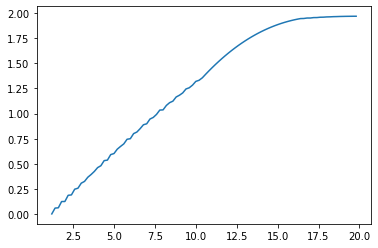

In [8]:
plt.plot(seperation, homogeneity)

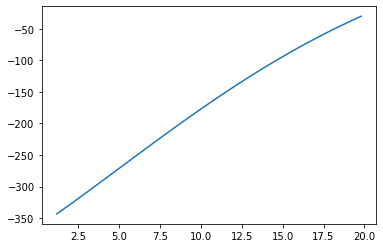

In [9]:
plt.plot(seperation, strength)

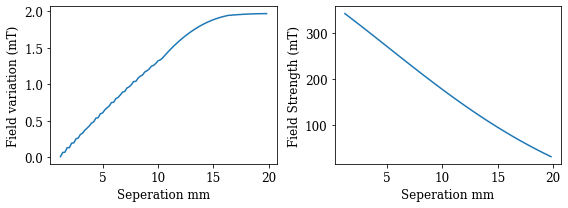

In [11]:
plt.rc('font', family='serif')
plt.rc('ytick', labelsize='12')
plt.rc('xtick', labelsize='12')

fig = plt.figure(figsize=(8,3))

ax1 = fig.add_subplot(121)
ax1.plot(seperation, homogeneity)
ax1.set_ylabel('Field variation (mT)', fontsize=12)
ax1.set_xlabel('Seperation mm', fontsize=12)

ax2 = fig.add_subplot(122)
ax2.plot(seperation, np.absolute(strength))
ax2.set_ylabel('Field Strength (mT)', fontsize=12)
ax2.set_xlabel('Seperation mm', fontsize=12)

plt.tight_layout()

plt.savefig('/Users/lyracronin/Dropbox/Apps/Overleaf/mqthesis-master/figures/homogeneity_strength_seperation.pdf')

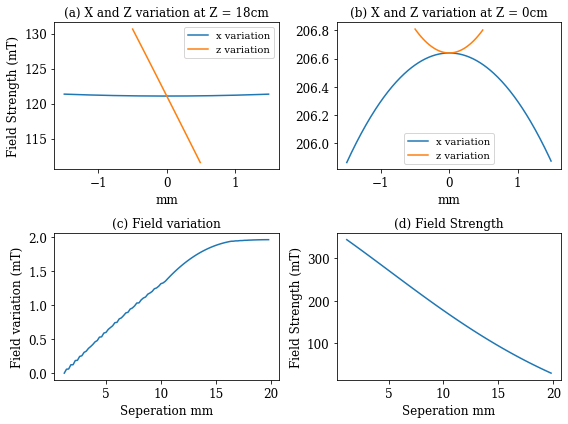

In [36]:
fig = plt.figure(figsize=(8,6))

ax1 = fig.add_subplot(221)
plt.title('(a) X and Z variation at Z = 18cm')
ax1.plot(xpositions, np.absolute(z_field1), label='x variation')
ax1.plot(zpositions, np.absolute(z_field2), label='z variation')
plt.legend()
ax1.set_ylabel('Field Strength (mT)', fontsize=12)
ax1.set_xlabel('mm', fontsize=12)

ax2 = fig.add_subplot(222)
plt.title('(b) X and Z variation at Z = 0cm')
ax2.plot(xpositions, np.absolute(z_field3), label='x variation')
ax2.plot(zpositions, np.absolute(z_field4), label='z variation')
plt.legend()
#ax2.set_ylabel('Field Strength (mT)', fontsize=12)
ax2.set_xlabel('mm', fontsize=12)

ax3 = fig.add_subplot(223)
plt.title('(c) Field variation')
ax3.plot(seperation, homogeneity)
ax3.set_ylabel('Field variation (mT)', fontsize=12)
ax3.set_xlabel('Seperation mm', fontsize=12)

ax4 = fig.add_subplot(224)
plt.title('(d) Field Strength')
ax4.plot(seperation, np.absolute(strength))
ax4.set_ylabel('Field Strength (mT)', fontsize=12)
ax4.set_xlabel('Seperation mm', fontsize=12)


plt.tight_layout()

plt.savefig('/Users/lyracronin/Dropbox/Apps/Overleaf/mqthesis-master/figures/new_homogeneity_strength_variation.pdf')

In [215]:
import numpy as np
import matplotlib.pyplot as plt
from magpylib.source.magnet import Cylinder
import magpylib as magpy

# create collection of two magnets
s1 = Cylinder(mag=[0,0,-1280], dim=[72,13], pos=[0,0,13])
s2 = Cylinder(mag=[0,0,1280], dim=[32.5,13], pos=[0,0,13])
s3 = Cylinder(mag=[0,0,1280], dim=[72,13], pos=[0,0,0])
s4 = Cylinder(mag=[0,0,-1280], dim=[32.5,13], pos=[0,0,0])
s5 = Cylinder(mag=[0,0,-1280], dim=[72,13], pos=[0,0,-13])
s6 = Cylinder(mag=[0,0,1280], dim=[32.5,13], pos=[0,0,-13])
c = magpy.Collection(s1,s2,s3,s4,s5,s6)

# create positions
xs = np.linspace(-50,50,200)
zs = np.linspace(-50,50,200)
posis = [[x,0,z] for z in zs for x in xs]

# calculate field and amplitude
B = [c.getB(pos) for pos in posis]
Bs = np.array(B).reshape([200,200,3]) #reshape
Bamp = np.linalg.norm(Bs,axis=2)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


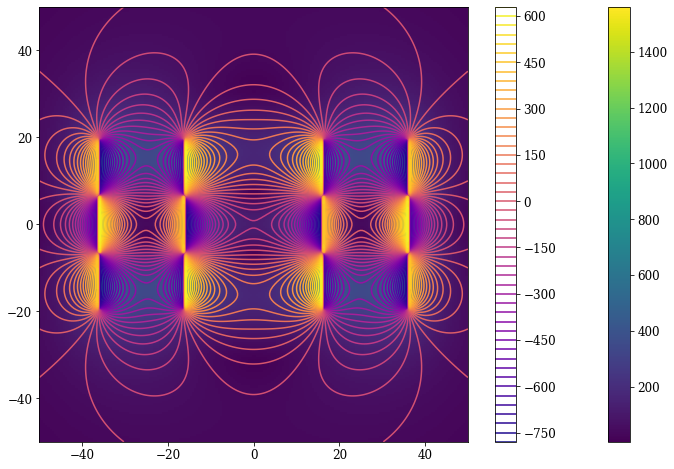

In [99]:
# define figure with a 2d and a 3d axis
fig = plt.figure(figsize=(12,8))
ax2 = fig.add_subplot(111)
'''
ax1 = fig.add_subplot(121,projection='3d')
ax2 = fig.add_subplot(122)

# add displaySystem on ax1
magpy.displaySystem(c,subplotAx=ax1,suppress=True)
ax1.view_init(elev=45)
'''
# amplitude plot on ax2
X,Z = np.meshgrid(xs,zs)
pc = ax2.pcolor(xs,zs,Bamp,cmap='viridis')
plt.colorbar(pc)

# plot field lines on ax2
U,V = Bs[:,:,0], Bs[:,:,2]
#ax2.streamplot(X,Z,U,V,color='k',density=2)
cc = ax2.contour(X,Z,V, levels=50, cmap='plasma')
plt.colorbar(cc)

#ax2.axhline(y=11.5, color='w')

plt.rc('font', family='serif')
plt.rc('ytick', labelsize='12')
plt.rc('xtick', labelsize='12')
'''
# Create a Rectangle patch
rect1 = patches.Rectangle((-36,5.5),19.75,13,linewidth=1,edgecolor='w',facecolor='none')
rect2 = patches.Rectangle((-36,-18.5),19.75,13,linewidth=1,edgecolor='w',facecolor='none')
rect3 = patches.Rectangle((16.25,5.5),19.75,13,linewidth=1,edgecolor='w',facecolor='none')
rect4 = patches.Rectangle((16.25,-18.5),19.75,13,linewidth=1,edgecolor='w',facecolor='none')
# Add the patch to the Axes
ax2.add_patch(rect1)
ax2.add_patch(rect2)
ax2.add_patch(rect3)
ax2.add_patch(rect4)
'''
#display
plt.show()

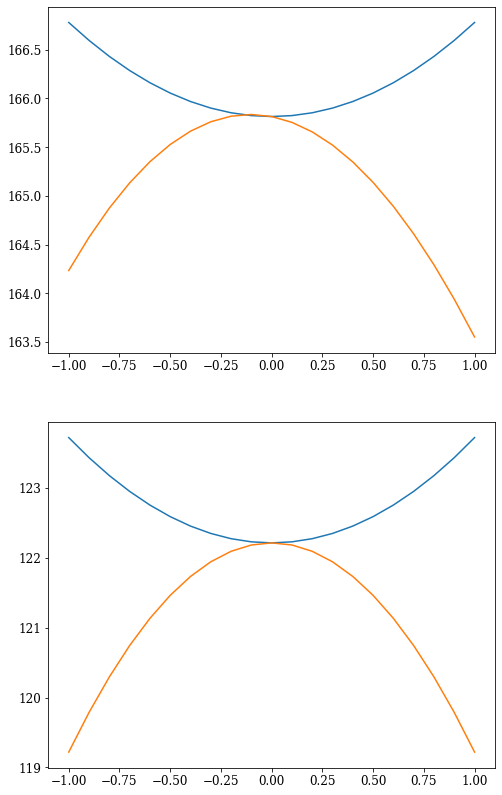

In [106]:
positions = np.arange(-1,1.1,0.1)
z_field1 = []
z_field2 = []
z_field3 = []
z_field4 = []

for i in positions:
    z_field1.append(c.getB([i,0,16.5])[2])

for i in positions:
    z_field2.append(c.getB([0,0,16.5+i])[2])
    
for i in positions:
    z_field3.append(c.getB([i,0,0])[2])
    
for i in positions:
    z_field4.append(c.getB([0,0,i])[2])

fig = plt.figure(figsize=(8,14))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(positions, np.absolute(z_field1))
ax1.plot(positions, np.absolute(z_field2))
ax2.plot(positions, np.absolute(z_field3))
ax2.plot(positions, np.absolute(z_field4))